In [48]:
import logging, os
import numpy as np

# logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))
log = logging.getLogger()
log.setLevel(logging.INFO)


class Player:
    def __init__(self, population, index=0):
        """
        Create a player country with a population of companies
        """
        self.company = [0] * len(population)
        for i in range(len(population)):
            self.company[i] = population[i]
        self.strategy = [None, None]
        self.index = index
        self.round_history = []
        log.debug(
            "Created player object with population "
            + str(self.company)
            + " under index "
            + str(self.index)
        )

    def __call__(self, payoffs):
        """
        Takes a payoff (positive or negative) and distributes it to the player
        """
        for i in range(len(payoffs)):
            self.company[i] += payoffs[i]
        self.round_history.append(payoffs)
        return migration


class Game:
    def __init__(self):
        self.players = []
        self.strategy = []
        self.payoff = {}
        self.state = []
        self.nash = {}

    def player_generator(self, input_population=[[3, 0], [1, 2], [2, 1]]):
        """
        Adds players to the game one by one
        """
        for i in range(1, len(input_population)):
            if len(input_population[i - 1]) != len(input_population[i]):
                error_text = (
                    "Inconsistent population sizes for indexes "
                    + str(i - 1)
                    + " and "
                    + str(i)
                )
                log.error(error_text)
                raise Error(error_text)
        if type(input_population) == list:
            for i in range(len(input_population)):
                self.players.append(Player(input_population[i], i))
        return self.players

    def update_strategies(self, strategies=[0, 1, 1]):
        givens = strategies
        for i in range(len(self.players)):
            given = givens[i]
            if given == 1:
                self.players[i].strategy = 1
            elif given == 0:
                self.players[i].strategy = 0
            else:
                log.error("You messed up.")
            # print('Player '+str(i)+' holds ('+str(self.players[i].company[0])+','+str(self.players[i].company[1])+') and decides '+str(self.players[i].strategy))
        # print('\n')
        self.strategy = [c.strategy for c in self.players]
        return self

    def round(self):
        """
        One round of payoff using simple assignment rule
        """
        for i in range(len(self.players)):
            p1 = self.players[i]
            contestants = []
            # print('Player '+str(p1.index)+' with '+str(p1.company))
            for j in range(len(self.players)):
                p2 = self.players[j]
                if i != j and p1.strategy != p2.strategy:
                    contestants.append(p2)
                    # print('Contested by ' +str(p2.index)+' with strategy '+str(p2.strategy))
            # sort first by second company to ensure tie breaking
            losing_type = 1 - p1.strategy
            contestants.sort(key=lambda x: x.company[p1.strategy], reverse=True)
            contestants.sort(key=lambda x: x.company[losing_type], reverse=True)
            contested_amount = len(contestants)
            losing_amount = min(p1.company[losing_type], contested_amount)
            # print('Losing '+str(losing_amount)+' of type '+str(losing_type))
            p1.company[losing_type] -= losing_amount
            while losing_amount > 0:
                for i in range(len(contestants)):
                    if losing_amount > 0:
                        contestants[i].company[losing_type] += 1
                        losing_amount -= 1
                    else:
                        break
            all_players = contestants + [p1]
            all_players.sort(key=lambda x: x.index)

    def obj2state():
        '''
        Using Player objects, returns state of the game as a numpy array
        '''
        state = None
        return state

    def obj2policy():
        '''
        Using Player objects, returns policies used by them
        '''
        policy = None
        return policy

    def round_fractional(self, roundoff=False):
        """
        One round of payoff using fractional pairwise assignment on objects
        """
        players: list = self.players
        for i, p1 in enumerate(players):
            losing_type = 1 - p1.strategy
            losing_amount = 1/(len(players)-1)*p1.company[losing_type]
            if roundoff: losing_amount=int(losing_amount)
            for j, p2 in enumerate(players):
                if i != j and p1.strategy != p2.strategy:
                    # That means conflict!
                    #print('Player '+str(i)+' looses '+str(losing_amount)+' to Player '+str(j))
                    p1.company[losing_type] -= losing_amount
                    p2.company[losing_type] += losing_amount
                    
    def round_fractional_np(self):
        '''
        One round of payoff using fractional pairwise assignment on numpy
        '''
        return payoff
            
    def print(self):
        for c in self.players:
            print("Player ", c.index, c.company, " score ", sum(c.company))

    def get_state(self):
        self.state = np.array(
            [[c.company[0] for c in self.players], [c.company[1] for c in self.players]]
        )
        return self

    def get_payoffs(self):
        self.get_state()
        base_state = self.state.copy()
        number_of_players = len(self.players)

        payoff = self.payoff
        strategies = all_binary_strategies(length=len(self.players))

        for strategy in strategies:
            str_strategy = "".join(map(str, strategy))
            self.players = []
            player_state = []
            # [list(base_state[:,0]),list(base_state[:,1]),list(base_state[:,2])]
            for i in range(number_of_players):
                player_state.append(list(base_state[:, i]))
            # print(player_state)
            self.player_generator(player_state)
            self.update_strategies(strategy)
            self.round()
            self.get_state()
            difference = self.state - base_state
            difference = np.sum(difference, axis=0)
            payoff[str_strategy] = list(difference)

    def get_nash(self):
        nash = self.nash
        strategies = all_binary_strategies(length=len(self.players))

        for strategy in strategies:
            str_strategy = "".join(map(str, strategy))
            nash[str_strategy] = self.is_strategy_nash(strategy)

    def is_strategy_nash(self, strategy):
        """
        For strategy being a list of binary values corresponding to 
        """
        is_nash = True
        base_payoff = self.payoff[
            "".join(map(str, strategy))
        ]  # np.sum(self.state, axis=0)
        for i in range(len(strategy)):
            compared_strategy = strategy.copy()
            compared_strategy[i] = 1 - compared_strategy[i]  # flips 1 and 0
            compare_payoff = self.payoff["".join(map(str, compared_strategy))]
            if base_payoff[i] < compare_payoff[i]:
                is_nash = False
            # print(strategy, compared_strategy, base_payoff[i]<compare_payoff[i])
        return is_nash

    def __call__(self, state=[[3, 0], [1, 2], [2, 1], [0, 0]], show_nash=True):
        self.player_generator(state)
        self.get_payoffs()
        # print('Payoffs:', self.payoff)
        self.get_nash()
        if show_nash == True:
            for key in self.nash:
                if self.nash[key] == True:
                    print("Nash:", key, " with payoff ", self.payoff[key])


def all_binary_strategies(length=3):
    from itertools import product

    strategies = []
    dummies = list(product(range(2), repeat=length))
    for i in range(0, len(dummies)):
        dummy = list(dummies[i])
        strategies.append(dummy)
    return strategies


def simulate(
    strategy=[1, 1, 0, 0, 0],
    start_population=[[5, 10], [5, 5], [15, 5], [15, 5], [30, 5]],
    iterations=10,
    payoff='fractional'
):
    game = Game()
    population = []
    game(start_population, show_nash=False)
    # game.print()
    game.update_strategies(strategy)
    game.get_state()
    game.print()
    s = [list(np.sum(game.state, axis=0))]
    # print(s)
    for i in range(iterations):
        game.update_strategies(strategy)
        if payoff=='fractional':
            game.round_fractional()
        else:
            game.round()
        game.get_state()
        game.print()
        s.append(list(np.sum(game.state, axis=0)))
    population = np.array(s)
    return population

In [49]:
simulate(iterations=20)

Player  0 [5, 10]  score  15
Player  1 [5, 5]  score  10
Player  2 [15, 5]  score  20
Player  3 [15, 5]  score  20
Player  4 [30, 5]  score  35
Player  0 [1.25, 13.75]  score  15.0
Player  1 [1.25, 8.75]  score  10.0
Player  2 [17.5, 2.5]  score  20.0
Player  3 [17.5, 2.5]  score  20.0
Player  4 [32.5, 2.5]  score  35.0
Player  0 [0.3125, 15.625]  score  15.9375
Player  1 [0.3125, 10.625]  score  10.9375
Player  2 [18.125, 1.25]  score  19.375
Player  3 [18.125, 1.25]  score  19.375
Player  4 [33.125, 1.25]  score  34.375
Player  0 [0.078125, 16.5625]  score  16.640625
Player  1 [0.078125, 11.5625]  score  11.640625
Player  2 [18.28125, 0.625]  score  18.90625
Player  3 [18.28125, 0.625]  score  18.90625
Player  4 [33.28125, 0.625]  score  33.90625
Player  0 [0.01953125, 17.03125]  score  17.05078125
Player  1 [0.01953125, 12.03125]  score  12.05078125
Player  2 [18.3203125, 0.3125]  score  18.6328125
Player  3 [18.3203125, 0.3125]  score  18.6328125
Player  4 [33.3203125, 0.3125]  sco

array([[15.        , 10.        , 20.        , 20.        , 35.        ],
       [15.        , 10.        , 20.        , 20.        , 35.        ],
       [15.9375    , 10.9375    , 19.375     , 19.375     , 34.375     ],
       [16.640625  , 11.640625  , 18.90625   , 18.90625   , 33.90625   ],
       [17.05078125, 12.05078125, 18.6328125 , 18.6328125 , 33.6328125 ],
       [17.27050781, 12.27050781, 18.48632812, 18.48632812, 33.48632812],
       [17.3840332 , 12.3840332 , 18.41064453, 18.41064453, 33.41064453],
       [17.44171143, 12.44171143, 18.37219238, 18.37219238, 33.37219238],
       [17.47077942, 12.47077942, 18.35281372, 18.35281372, 33.35281372],
       [17.48537064, 12.48537064, 18.34308624, 18.34308624, 33.34308624],
       [17.49268055, 12.49268055, 18.33821297, 18.33821297, 33.33821297],
       [17.49633908, 12.49633908, 18.33577394, 18.33577394, 33.33577394],
       [17.49816924, 12.49816924, 18.33455384, 18.33455384, 33.33455384],
       [17.49908455, 12.49908455, 18.3

In [1]:
from corpgame import Game
# create a simple mobility game
game = Game()
# show nash equilibria for starting conditions
game(state=[[3, 0], [1, 2], [2, 1]])
game.payoff


Nash: 000  with payoff  [0, 0, 0]
Nash: 010  with payoff  [1, 0, -1]
Nash: 100  with payoff  [0, 0, 0]


{'000': [0, 0, 0],
 '001': [1, 0, -1],
 '010': [1, 0, -1],
 '011': [2, -1, -1],
 '100': [0, 0, 0],
 '101': [0, 0, 0],
 '110': [-1, 0, 1],
 '111': [0, 0, 0]}

In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_true = np.array([[1,1,-2],[3,-2,-1]])
y_pred = np.array([[0,1,-1],[1,0,-1]])
print(y_true)
print(y_pred)
mse = mean_squared_error(y_true, y_pred, multioutput='raw_values')
print(mse, '=', sum(mse))
print(mse, '=', sum(mse)**0.5)
print(y_true-y_pred)

[[ 1  1 -2]
 [ 3 -2 -1]]
[[ 0  1 -1]
 [ 1  0 -1]]
[2.5 2.  0.5] = 5.0
[2.5 2.  0.5] = 2.23606797749979
[[ 1  0 -1]
 [ 2 -2  0]]


In [3]:
def simulate_step(
    strategy=[1, 1, 0, 0, 0],
    start_population=[[5, 10], [5, 5], [15, 5], [15, 5], [30, 5]]
):
    game = Game()
    population = []
    game(start_population, show_nash=False)
    # game.print()
    game.update_strategies(strategy)
    game.get_state()
    # print(s)
    game.update_strategies(strategy)
    game.round()
    game.get_state()
    state = game.state.transpose()
    return state

population = [[3, 3], [1, 2], [2, 1]]
strategies = [[0,1,0],[0,1,0],[1,1,0]]
population_evolution = []

for strategy in strategies:
    population = simulate_step(strategy=strategy, start_population=list(population))
    #print(population)
    population_evolution.append(np.sum(population, axis=1))
print(population_evolution)
import pandas as pd
pd.DataFrame(population_evolution).plot.line()

[array([6, 4, 2]), array([5, 5, 2]), array([4, 5, 3])]


[[3 3 3]
 [4 3 2]
 [4 3 2]]


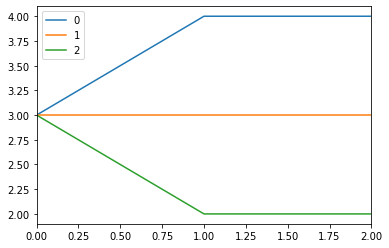

In [17]:
from corpgame import simulate
# simulate 10 rounds with a given strategy
population_evolution = simulate(strategy=[0,1,0], start_population=[[3, 0], [1, 2], [2, 1]], iterations = 2)
# plot
print(population_evolution)
import pandas as pd
pd.DataFrame(population_evolution).plot.line()

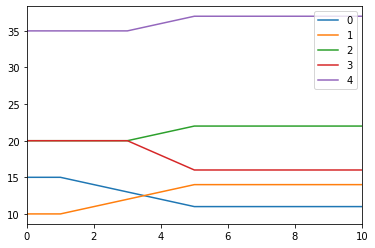

In [66]:
population = simulate(strategy=[0,1,0,1,0])
pd.DataFrame(population).plot.line()

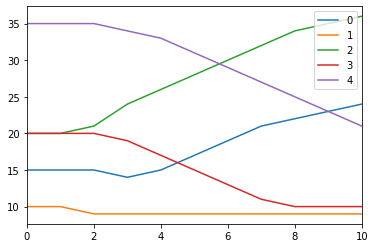

In [67]:
population = simulate(strategy=[0,1,0,1,1])
pd.DataFrame(population).plot.line()

In [6]:
# time execution iteratively by number of players
import random, time
for size in range(3, 100):
    start = time.time()
    population = [[random.randint(0,5),random.randint(0,5)] for i in range(0, size)]
    game = Game()
    game(population, show_nash=False)
    end = time.time()-start
    print(size, end)

3 0.0008804798126220703
4 0.0013201236724853516
5 0.0030183792114257812
6 0.008784055709838867
7 0.025992631912231445
8 0.03695416450500488
9 0.08102822303771973
10 0.18424010276794434
11 0.39885759353637695
12 0.896477222442627
13 2.021888494491577
14 4.515799522399902
15 9.836885213851929
16 20.718082666397095
17 46.46681213378906
18 102.37133288383484


KeyboardInterrupt: 

In [108]:
game = Game()
game.player_generator([[3,0],[1,2],[2,1],[0,0]])
#game.update_strategies([0,1,1,1])
game.get_payoffs()
print('payoff', game.payoff)
game.get_state()
#print('state', game.state)
game.get_nash()
print('nash', game.nash)


[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
[[3, 0], [1, 2], [2, 1], [0, 0]]
payoff {'0000': [0, 0, 0, 0], '0001': [0, -1, -1, 2], '0010': [1, 0, -1, 0], '0011': [1, -1, -1, 1], '0100': [1, 0, -1, 0], '0101': [1, 0, -1, 0], '0110': [2, -1, -2, 1], '0111': [2, -1, -1, 0], '1000': [-1, 0, 0, 1], '1001': [0, -1, 0, 1], '1010': [-1, 0, -1, 2], '1011': [0, 0, 0, 0], '1100': [-2, 0, 1, 1], '1101': [-1, 0, 1, 0], '1110': [-1, -1, -1, 3], '1111': [0, 0, 0, 0]}
nash {'0000': False, '0001': False, '0010': False, '0011': True, '0100': True, '0101': True,

In [96]:
%%time
log.setLevel(logging.DEBUG)
game = Game()
game.player_generator()
game.update_strategies([0,1,1])
for i in range(0,3):
    game.round()
    game.print()
    print('\n')

Player  0 [5, 0]  score  5
Player  1 [0, 2]  score  2
Player  2 [1, 1]  score  2


Player  0 [6, 0]  score  6
Player  1 [0, 2]  score  2
Player  2 [0, 1]  score  1


Player  0 [6, 0]  score  6
Player  1 [0, 2]  score  2
Player  2 [0, 1]  score  1


CPU times: user 1.26 ms, sys: 0 ns, total: 1.26 ms
Wall time: 847 µs


In [57]:
# toy example
player = 0
populations = [[3,0],[1,2],[2,1]]
strategies = all_binary_strategies(length=3)
for strategy in strategies:
    game = Game()
    game.player_generator(populations)
    game.update_strategies(strategy)
    for i in range(0,1):
        game.round()
    print(strategy)
    for c in game.players:
        print(c.index, c.company, sum(c.company))
    score = sum(game.players[player].company)
    print('\n')

DEBUG:root:Created player object with population [3, 0] under index 0
DEBUG:root:Created player object with population [1, 2] under index 1
DEBUG:root:Created player object with population [2, 1] under index 2
DEBUG:root:Created player object with population [3, 0] under index 0
DEBUG:root:Created player object with population [1, 2] under index 1
DEBUG:root:Created player object with population [2, 1] under index 2
DEBUG:root:Created player object with population [3, 0] under index 0
DEBUG:root:Created player object with population [1, 2] under index 1
DEBUG:root:Created player object with population [2, 1] under index 2
DEBUG:root:Created player object with population [3, 0] under index 0
DEBUG:root:Created player object with population [1, 2] under index 1
DEBUG:root:Created player object with population [2, 1] under index 2
DEBUG:root:Created player object with population [3, 0] under index 0
DEBUG:root:Created player object with population [1, 2] under index 1
DEBUG:root:Created p

[0, 0, 0]
0 [3, 0] 3
1 [1, 2] 3
2 [2, 1] 3


[0, 0, 1]
0 [4, 0] 4
1 [2, 1] 3
2 [0, 2] 2


[0, 1, 0]
0 [4, 0] 4
1 [0, 3] 3
2 [2, 0] 2


[0, 1, 1]
0 [5, 0] 5
1 [0, 2] 2
2 [1, 1] 2


[1, 0, 0]
0 [1, 2] 3
1 [2, 1] 3
2 [3, 0] 3


[1, 0, 1]
0 [2, 1] 3
1 [3, 0] 3
2 [1, 2] 3


[1, 1, 0]
0 [2, 0] 2
1 [0, 3] 3
2 [4, 0] 4


[1, 1, 1]
0 [3, 0] 3
1 [1, 2] 3
2 [2, 1] 3




In [66]:
# test example
player = 0
populations = [[5,10],[5,5],[15,5],[15,5],[30,5]]

game = Game()
game.player_generator(populations)
game.update_strategies([1,1,0,0,0])
game.print()
print('\n')
for i in range(5):
    game.round()
    game.print()
    print('\n')

DEBUG:root:Created player object with population [5, 10] under index 0
DEBUG:root:Created player object with population [5, 5] under index 1
DEBUG:root:Created player object with population [15, 5] under index 2
DEBUG:root:Created player object with population [15, 5] under index 3
DEBUG:root:Created player object with population [30, 5] under index 4


Player  0 [5, 10]  score  15
Player  1 [5, 5]  score  10
Player  2 [15, 5]  score  20
Player  3 [15, 5]  score  20
Player  4 [30, 5]  score  35


Player  0 [2, 13]  score  15
Player  1 [2, 8]  score  10
Player  2 [17, 3]  score  20
Player  3 [17, 3]  score  20
Player  4 [32, 3]  score  35


Player  0 [0, 16]  score  16
Player  1 [0, 11]  score  11
Player  2 [19, 1]  score  20
Player  3 [17, 1]  score  18
Player  4 [34, 1]  score  35


Player  0 [0, 19]  score  19
Player  1 [0, 11]  score  11
Player  2 [19, 0]  score  19
Player  3 [17, 0]  score  17
Player  4 [34, 0]  score  34


Player  0 [0, 19]  score  19
Player  1 [0, 11]  score  11
Player  2 [19, 0]  score  19
Player  3 [17, 0]  score  17
Player  4 [34, 0]  score  34


Player  0 [0, 19]  score  19
Player  1 [0, 11]  score  11
Player  2 [19, 0]  score  19
Player  3 [17, 0]  score  17
Player  4 [34, 0]  score  34




In [211]:
def final_states(seed = [[1,2],[3,1],[4,0]]):
    from itertools import product
    for player in range(len(seed)):
        scores = []
        print(player)
        for branch in [0,1]:
            strategies = []
            dummies = list(product(range(2), repeat=len(seed)-1))
            for i in range(0,len(seed)+1):
                strategy = []
                dummy = list(dummies[i])
                for j in range(0,len(seed)):
                    k=0
                    if j==player:
                        strategy.append(branch)
                    else:
                        popped = dummy.pop(k)
                        strategy.append(popped)
                        k=k+1
                strategies.append(strategy)
            print(strategies)
            score = 0
            for strategy in strategies:
                game = Game()
                game.player_generator(seed)
                game.update_strategies(strategy)
                for i in range(0,100):
                    game.round()
                score += sum(game.players[player].company)
            scores.append(score)
            print(score)
        print(scores)
        print('\n')

In [212]:
final_states([[1,2],[3,1],[4,0],[1,0],[1,5]])

0
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 1, 0, 0], [0, 0, 1, 0, 1]]
10
[[1, 0, 0, 0, 0], [1, 0, 0, 0, 1], [1, 0, 0, 1, 0], [1, 0, 0, 1, 1], [1, 0, 1, 0, 0], [1, 0, 1, 0, 1]]
26
[10, 26]


1
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 1, 0, 0], [0, 0, 1, 0, 1]]
23
[[0, 1, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 1, 0], [0, 1, 0, 1, 1], [0, 1, 1, 0, 0], [0, 1, 1, 0, 1]]
24
[23, 24]


2
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 1, 0, 0, 0], [0, 1, 0, 0, 1]]
31
[[0, 0, 1, 0, 0], [0, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [0, 1, 1, 0, 0], [0, 1, 1, 0, 1]]
18
[31, 18]


3
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 1, 0, 0], [0, 0, 1, 0, 1], [0, 1, 0, 0, 0], [0, 1, 0, 0, 1]]
9
[[0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [0, 1, 0, 1, 0], [0, 1, 0, 1, 1]]
15
[9, 15]


4
[[0, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 1, 0, 0, 0], [0, 1, 0, 1, 0

In [220]:
game = Game()
game.player_generator([[1,2],[3,1],[4,0],[1,0],[1,5]])
game.print()
print('\n')
strategies = [[1,0,0,0,1],[0,0,0,0,1],[1,1,0,0,1],[1,0,1,0,1],[1,0,0,1,1],[1,0,0,0,0]]

for strategy in strategies:
    game = Game()
    game.player_generator([[1,2],[3,1],[4,0],[1,0],[1,5]])
    game.update_strategies(strategy)
    #game.print()
    #print('\n')
    print(strategy)
    for i in range(0,10):
        game.round()
    game.print()
    print('\n')

Player  0 [1, 2]  score  3
Player  1 [3, 1]  score  4
Player  2 [4, 0]  score  4
Player  3 [1, 0]  score  1
Player  4 [1, 5]  score  6


[1, 0, 0, 0, 1]
Player  0 [0, 2]  score  2
Player  1 [3, 0]  score  3
Player  2 [6, 0]  score  6
Player  3 [1, 0]  score  1
Player  4 [0, 6]  score  6


[0, 0, 0, 0, 1]
Player  0 [1, 0]  score  1
Player  1 [3, 0]  score  3
Player  2 [5, 0]  score  5
Player  3 [1, 0]  score  1
Player  4 [0, 8]  score  8


[1, 1, 0, 0, 1]
Player  0 [0, 2]  score  2
Player  1 [0, 1]  score  1
Player  2 [8, 0]  score  8
Player  3 [2, 0]  score  2
Player  4 [0, 5]  score  5


[1, 0, 1, 0, 1]
Player  0 [0, 2]  score  2
Player  1 [7, 0]  score  7
Player  2 [0, 0]  score  0
Player  3 [3, 0]  score  3
Player  4 [0, 6]  score  6


[1, 0, 0, 1, 1]
Player  0 [0, 2]  score  2
Player  1 [3, 0]  score  3
Player  2 [7, 0]  score  7
Player  3 [0, 0]  score  0
Player  4 [0, 6]  score  6


[1, 0, 0, 0, 0]
Player  0 [0, 8]  score  8
Player  1 [3, 0]  score  3
Player  2 [5, 0]  score  5
P